In [1]:
"""
    Hi! This is my first try on doing a data science project completely by myself
    All knowledge used for this project is from internet tutorials and guides :)
    The intention for this is just to explore basic concepts of data analysis, graphs
and overall data manipulation.
"""

'\n    Hi! This is my first try on doing a data science project completely by myself\n    All knowledge used for this project is from internet tutorials and guides :)\n    The intention for this is just to explore basic concepts of data analysis, graphs\nand overall data manipulation.\n'

In [2]:
# Dependecies

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')

2024-07-03 20:22:48.305859: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 20:22:48.309756: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-03 20:22:48.321408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 20:22:48.343621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 20:22:48.343677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-03 20:22:48.358103: I tensorflow/core/platform/cpu_feature_guard.cc:

In [3]:
# Get the dataframe

# Data source: https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a#file-life_expectancy_data-csv

df = pd.read_csv('Life_Expectancy_Data.csv')

df.head()

,Country,Continent,Year,Status,Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,479.00,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,86,58.0,8.18,62,0.1,612.696514,327582,17.5,476.00,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,89,62.0,8.13,64,0.1,631.744976,31731688,17.7,0.47,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,93,67.0,8.52,67,0.1,669959.000000,3696958,17.9,463.00,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,97,68.0,7.87,68,0.1,63.537231,2978599,18.2,454.00,9.5


In [4]:
# Getting the information for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2461 non-null   object 
 1   Continent                        2461 non-null   object 
 2   Year                             2461 non-null   int64  
 3   Status                           2461 non-null   object 
 4   Expectancy                       2461 non-null   float64
 5   Adult_Mortality                  2461 non-null   int64  
 6   infant_deaths                    2461 non-null   int64  
 7   Alcohol                          2461 non-null   float64
 8   percentage_expenditure           2461 non-null   float64
 9   Hepatitis_B                      1997 non-null   float64
 10  Measles                          2461 non-null   int64  
 11  BMI                              2461 non-null   float64
 12  under_five_deaths   

In [5]:
# Checking null data

df.isnull().sum()

Country                              0
Continent                            0
Year                                 0
Status                               0
Expectancy                           0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                              0
percentage_expenditure               0
Hepatitis_B                        464
Measles                              0
BMI                                  0
under_five_deaths                    0
Polio                                8
Total_expenditure                  152
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
Thinness_1-19_years                  0
Income_composition_of_resources      3
Schooling                            3
dtype: int64

In [6]:
# Dropping rows that contain null data

df = df.dropna(axis = 0)

In [7]:
# Checking any null remainders

df.isnull().sum()

Country                            0
Continent                          0
Year                               0
Status                             0
Expectancy                         0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [8]:
# Dropping rows in the column "Population" in which the content is
# equal to 'Unknown' to avoid conflicts when converting the data from
# Object to numeric

df = df[((df.Population != 'Unknown'))]

# Converting Population from Object to float64

df['Population'] = pd.to_numeric(df['Population'])

In [9]:
# Checking if the convertion was successful

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2460
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Continent                        1649 non-null   object 
 2   Year                             1649 non-null   int64  
 3   Status                           1649 non-null   object 
 4   Expectancy                       1649 non-null   float64
 5   Adult_Mortality                  1649 non-null   int64  
 6   infant_deaths                    1649 non-null   int64  
 7   Alcohol                          1649 non-null   float64
 8   percentage_expenditure           1649 non-null   float64
 9   Hepatitis_B                      1649 non-null   float64
 10  Measles                          1649 non-null   int64  
 11  BMI                              1649 non-null   float64
 12  under_five_deaths        

In [10]:
# Getting needed data for basic graphics modeling

clean_data = df.filter(['Year', 'Continent', 'Country', 'Expectancy'])

In [11]:
# Checking the content of the new DataFrame

clean_data.head()

,Year,Continent,Country,Expectancy
0,2015,Asia,Afghanistan,65.0
1,2014,Asia,Afghanistan,59.9
2,2013,Asia,Afghanistan,59.9
3,2012,Asia,Afghanistan,59.5
4,2011,Asia,Afghanistan,59.2


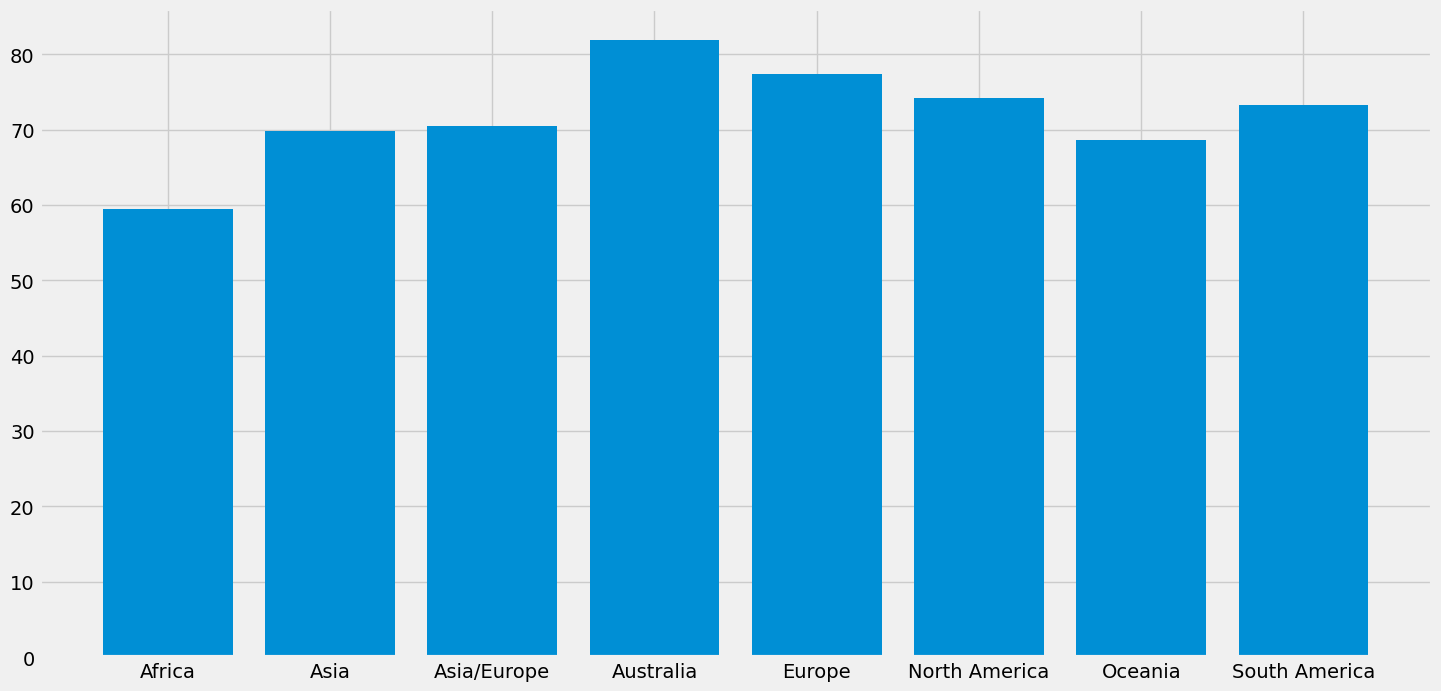

In [12]:
# Average life expectancy by continent

# List of continents sorted
x = sorted(df['Continent'].unique())

# Average life expectancy grouped by continent
y = df.groupby(['Continent'])['Expectancy'].mean()

# Graph

plt.figure(figsize = (16, 8))

plt.bar(x, y)

plt.show()

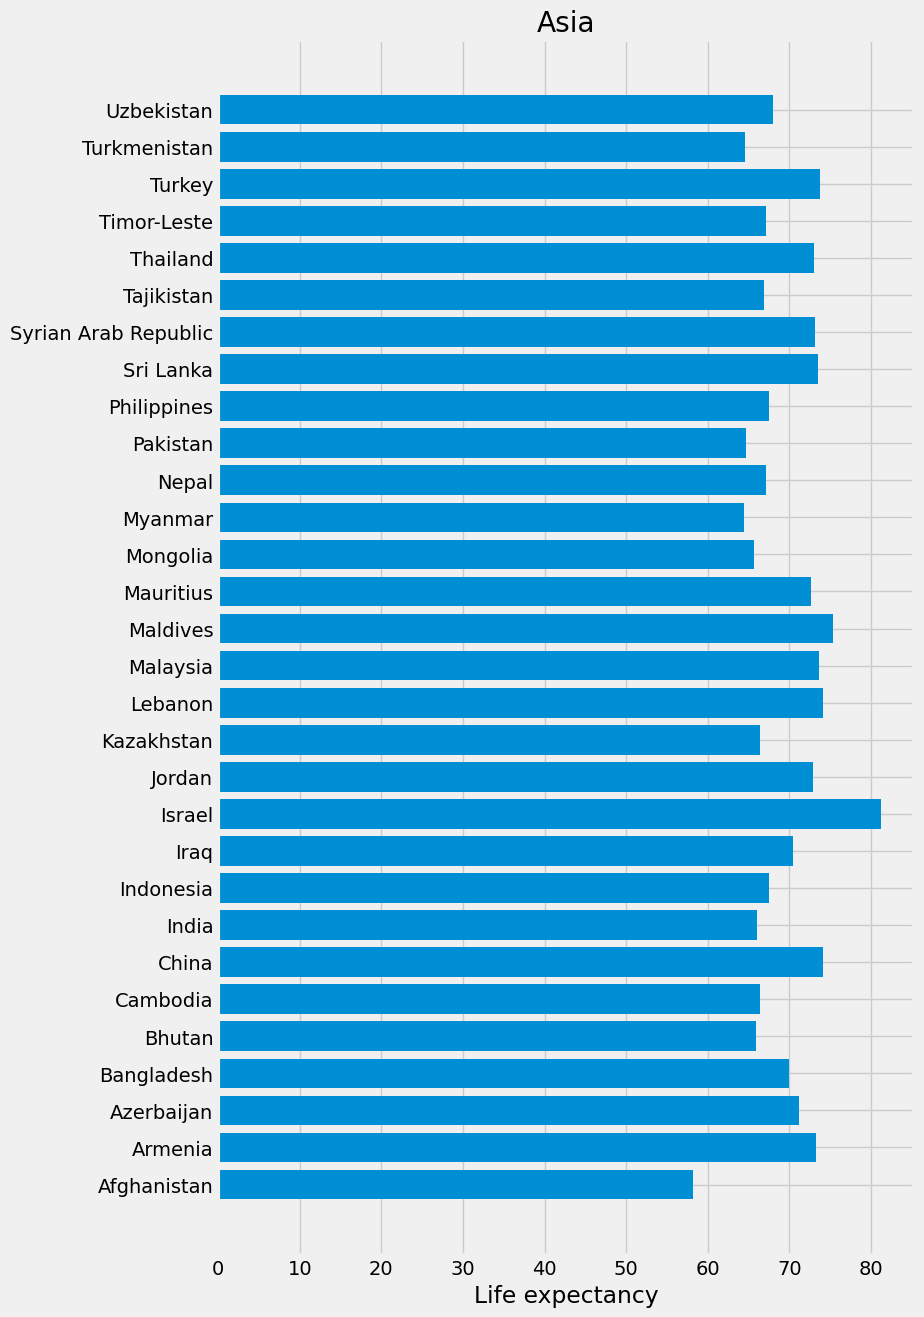

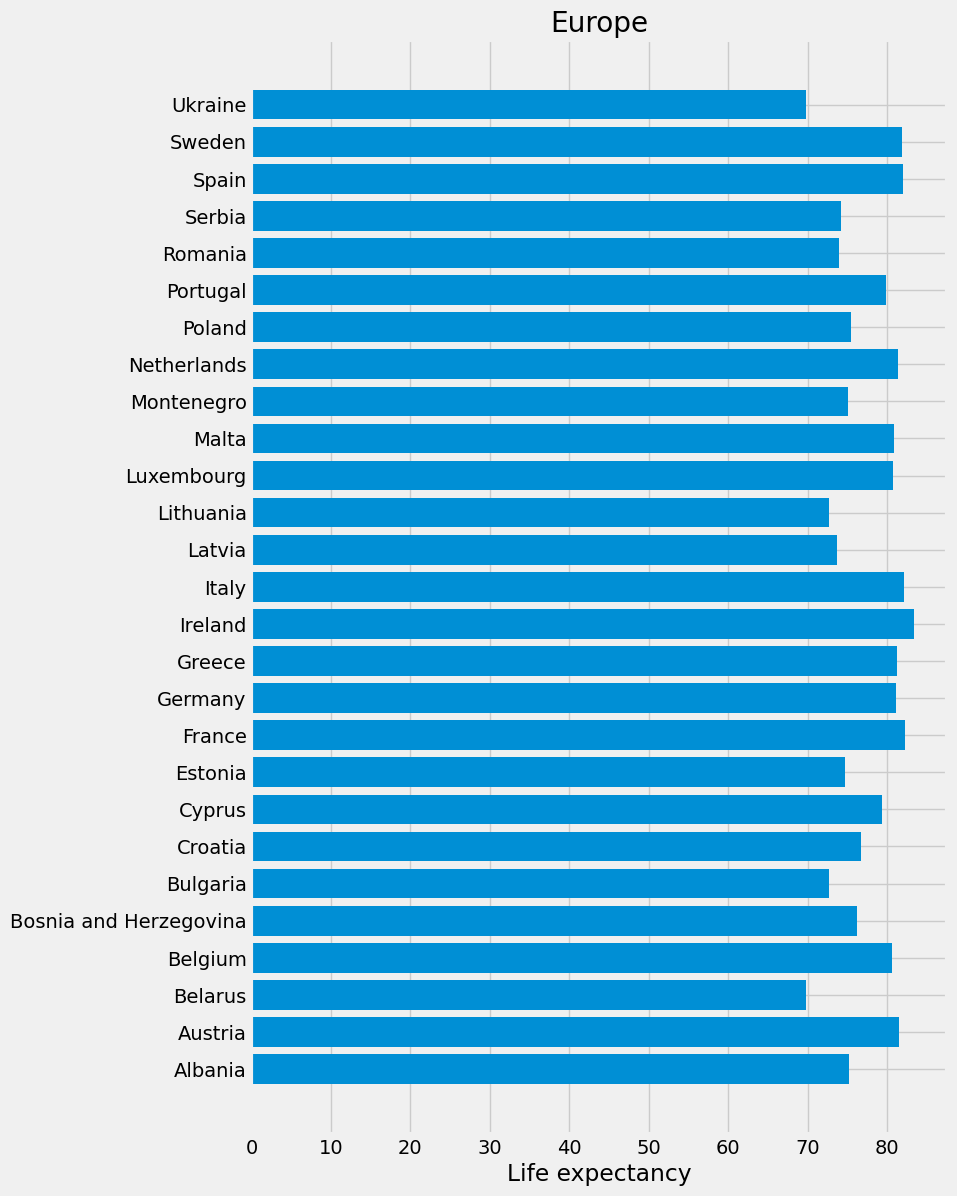

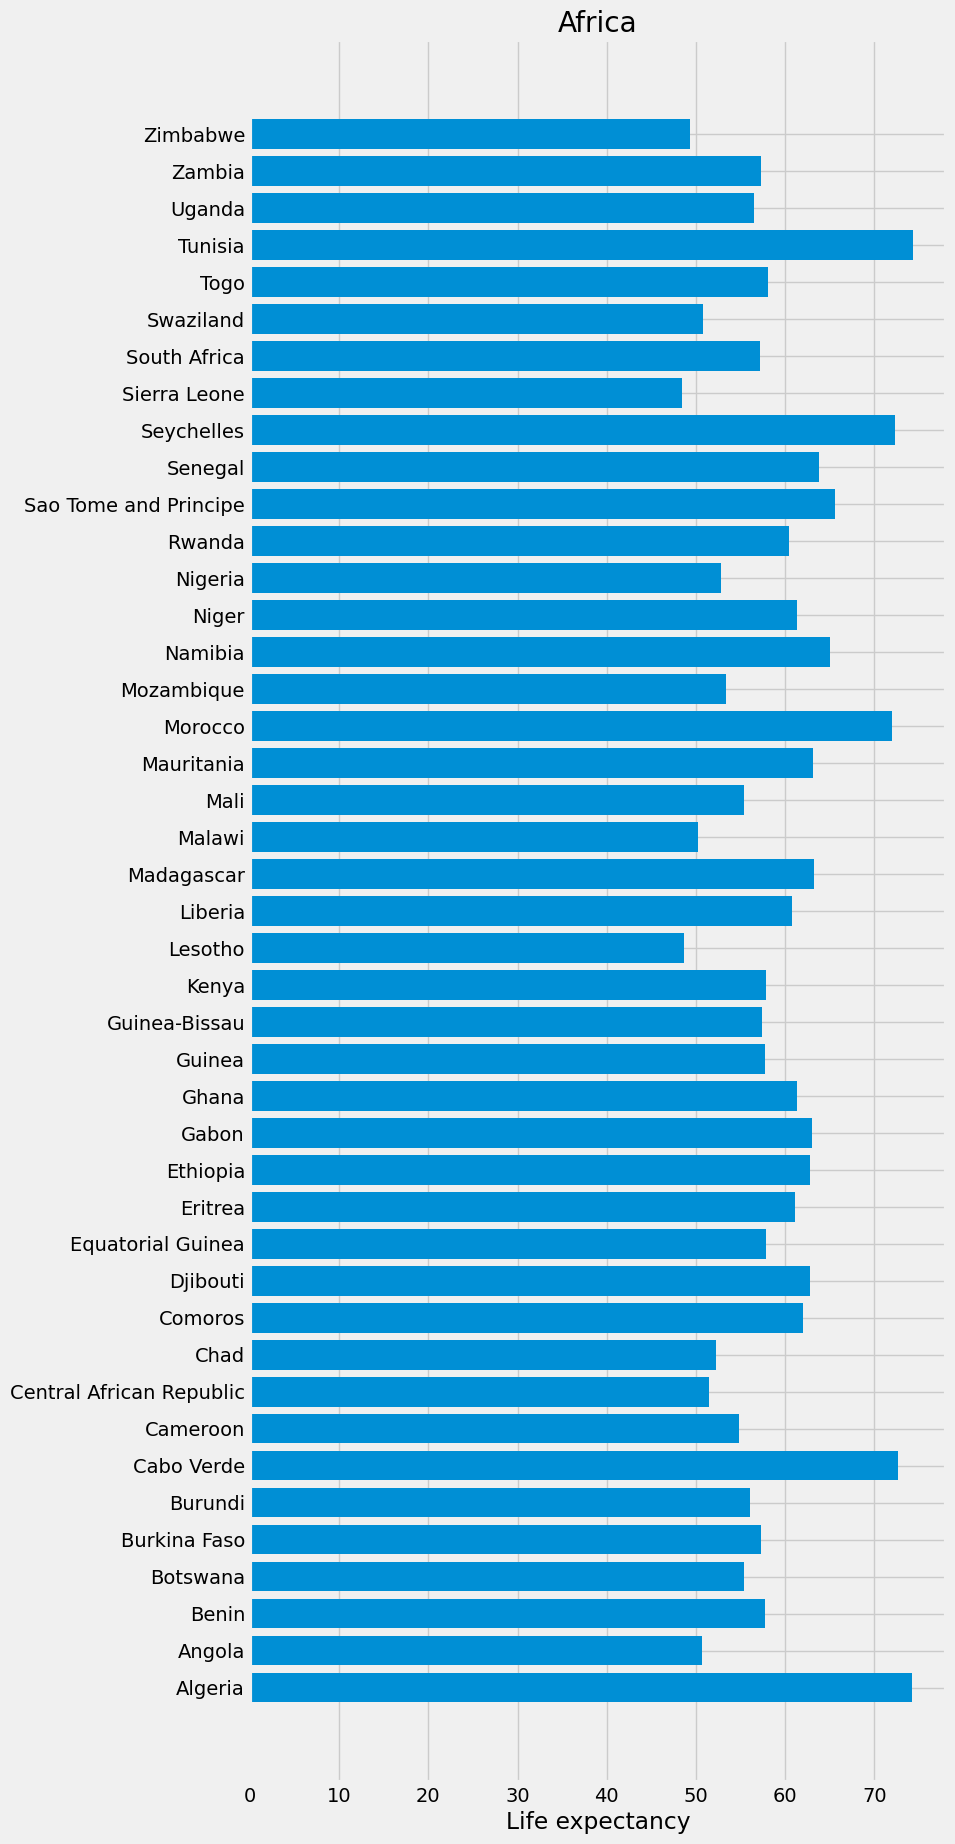

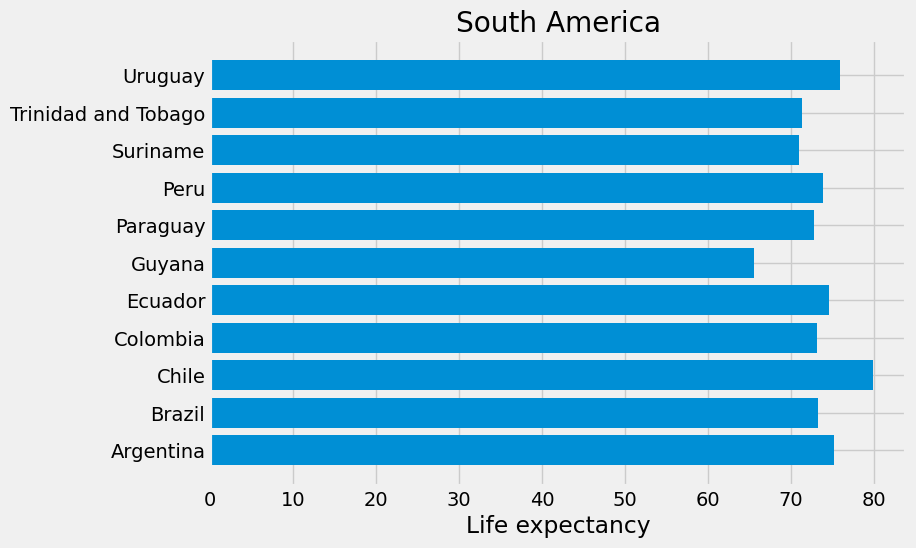

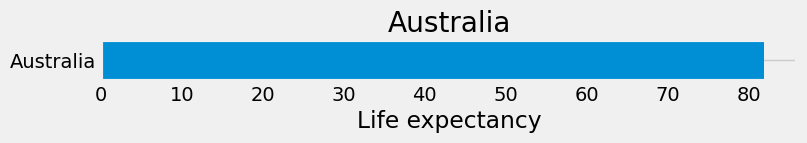

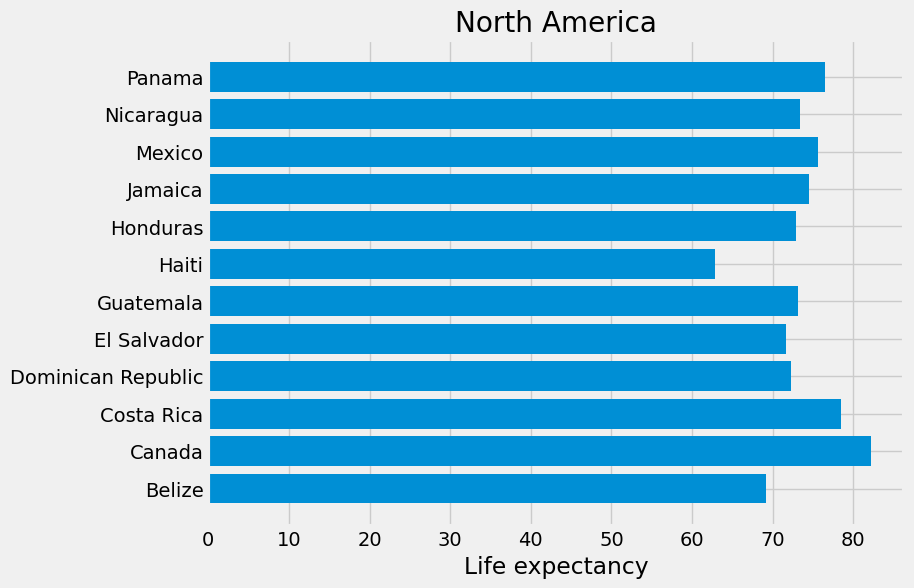

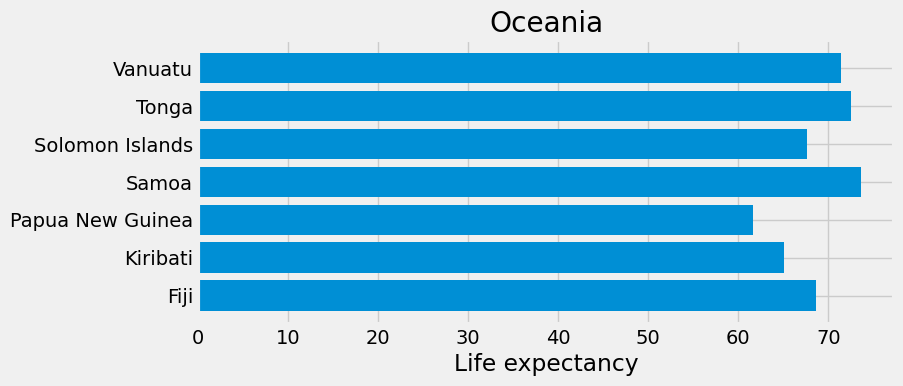

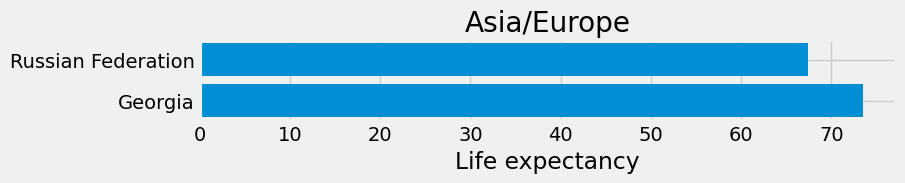

In [13]:
# Filter method that returns DataFrame whith not null values only where
# the condition is satisfied

def filter_by_continent(continent):
    return clean_data['Continent'] == continent

# Average life expentacy by country by continent

# List of countries by continent

countries_by_continent = []
for i in range(len(clean_data['Continent'].unique())):
    countries_by_continent.append(clean_data.where(filter_by_continent(clean_data['Continent'].unique()[i])).dropna())

# Ploting one graph for each continent

for i in range(len(countries_by_continent)):

    # Getting the countries for the continent in index i
    x = sorted(countries_by_continent[i]['Country'].unique())

    
    # Getting the average life expectancy for each country
    y = countries_by_continent[i].groupby(['Country'])['Expectancy'].mean()


    # Graph for that continent
    plt.figure(figsize = (8, len(y)*.5))

    plt.title(clean_data['Continent'].unique()[i])

    plt.barh(y=x, width=y)

    plt.xlabel('Life expectancy')

    plt.show()

In [14]:
# Highest and lowest life expentacy

# Last record of each country (2015)

all_countries_last_year = clean_data.groupby('Country').head(1).reset_index(drop=True)

# Get the highest and lowest

x_highest, y_highest = all_countries_last_year.sort_values('Expectancy').tail(1)['Country'], all_countries_last_year['Expectancy'].max()

x_lowest, y_lowest = all_countries_last_year.sort_values('Expectancy').head(1)['Country'],all_countries_last_year['Expectancy'].min()

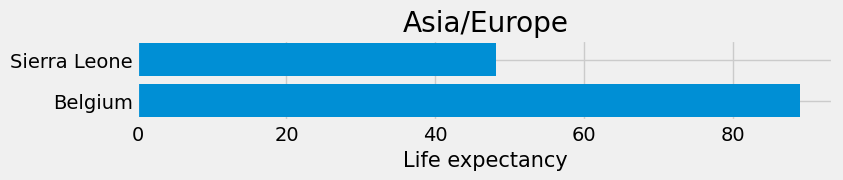

In [15]:
# Difference between the highest and lowest in a graphic

plt.figure(figsize = (8, len(y)*.5))

plt.title(clean_data['Continent'].unique()[i])

plt.barh(y=(x_highest.array[0], x_lowest.array[0]), width=(y_highest, y_lowest))

plt.xlabel('Life expectancy', fontsize = 15)

plt.show()

In [16]:
# Now, I'm going to look deeper into the original dataset and try to find what
# influences the most in a country's life expectancy

# Exploring more of the data in the original dataset

df.head(50)

,Country,Continent,Year,Status,Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,83,6.0,8.16,65,0.1,584.259210,33736494.0,17.2,479.00,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,86,58.0,8.18,62,0.1,612.696514,327582.0,17.5,476.00,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,89,62.0,8.13,64,0.1,631.744976,31731688.0,17.7,0.47,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,93,67.0,8.52,67,0.1,669959.000000,3696958.0,17.9,463.00,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,97,68.0,7.87,68,0.1,63.537231,2978599.0,18.2,454.00,9.5
5,Afghanistan,Asia,2010,Developing,58.8,279,74,0.01,79.679367,66.0,...,102,66.0,9.20,66,0.1,553.328940,2883167.0,18.4,448.00,9.2
6,Afghanistan,Asia,2009,Developing,58.6,281,77,0.01,56.762217,63.0,...,106,63.0,9.42,63,0.1,445.893298,284331.0,18.6,434.00,8.9
7,Afghanistan,Asia,2008,Developing,58.1,287,80,0.03,25.873925,64.0,...,110,64.0,8.33,64,0.1,373.361116,2729431.0,18.8,433.00,8.7
8,Afghanistan,Asia,2007,Developing,57.5,295,82,0.02,10.910156,63.0,...,113,63.0,6.73,63,0.1,369.835796,26616792.0,19.0,415.00,8.4
9,Afghanistan,Asia,2006,Developing,57.3,295,84,0.03,17.171518,64.0,...,116,58.0,7.43,58,0.1,272.563770,2589345.0,19.2,405.00,8.1


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Expectancy'}>,
        <Axes: title={'center': 'Adult_Mortality'}>,
        <Axes: title={'center': 'infant_deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage_expenditure'}>,
        <Axes: title={'center': 'Hepatitis_B'}>,
        <Axes: title={'center': 'Measles'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'under_five_deaths'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total_expenditure'}>],
       [<Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Thinness_1-19_years'}>],
       [<Axes: title={'center': 'Income_composition_of_resources'}>,
        <Axes: title={'center': 'Schooling'}>, <Axes: >, <Axes: >]],
      dtype=object)

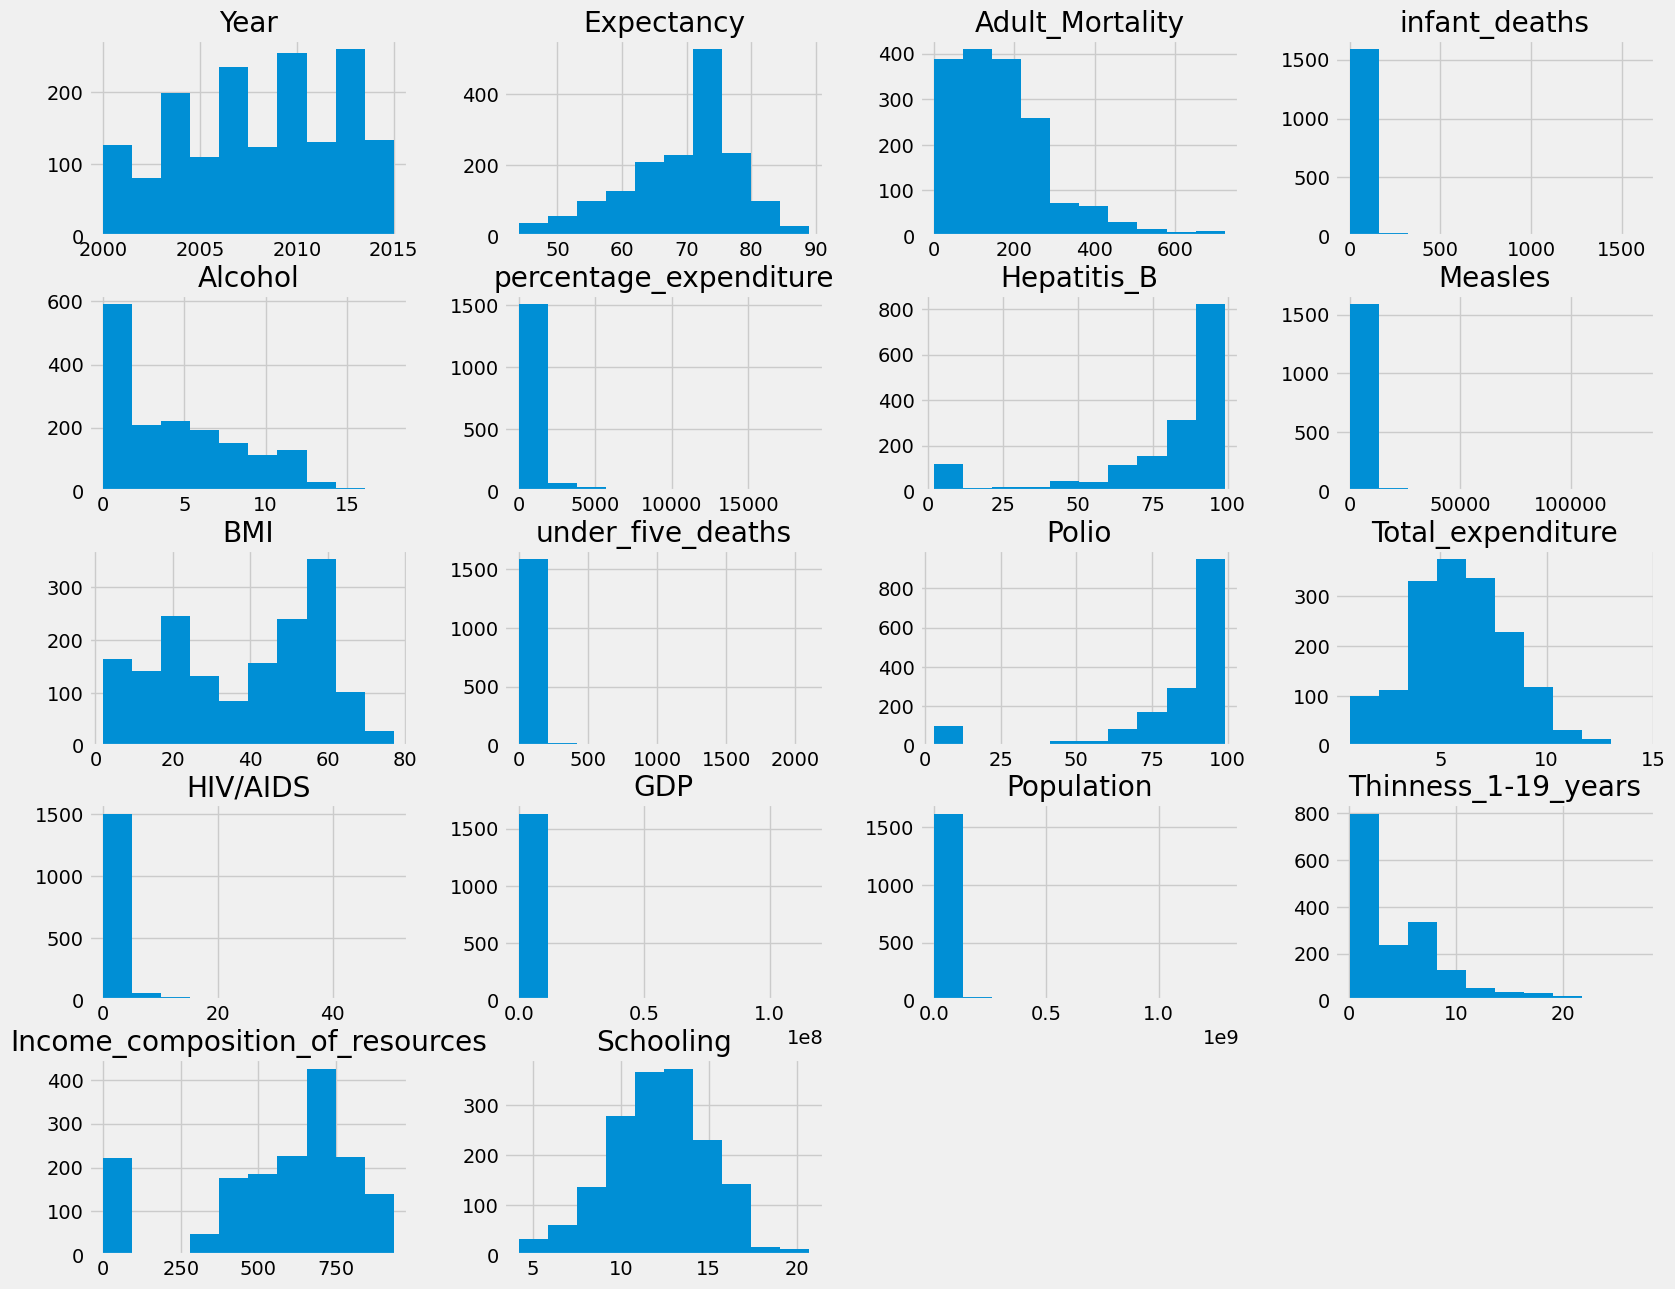

In [17]:
df.hist(figsize=(18, 15), legend = False)

<Axes: >

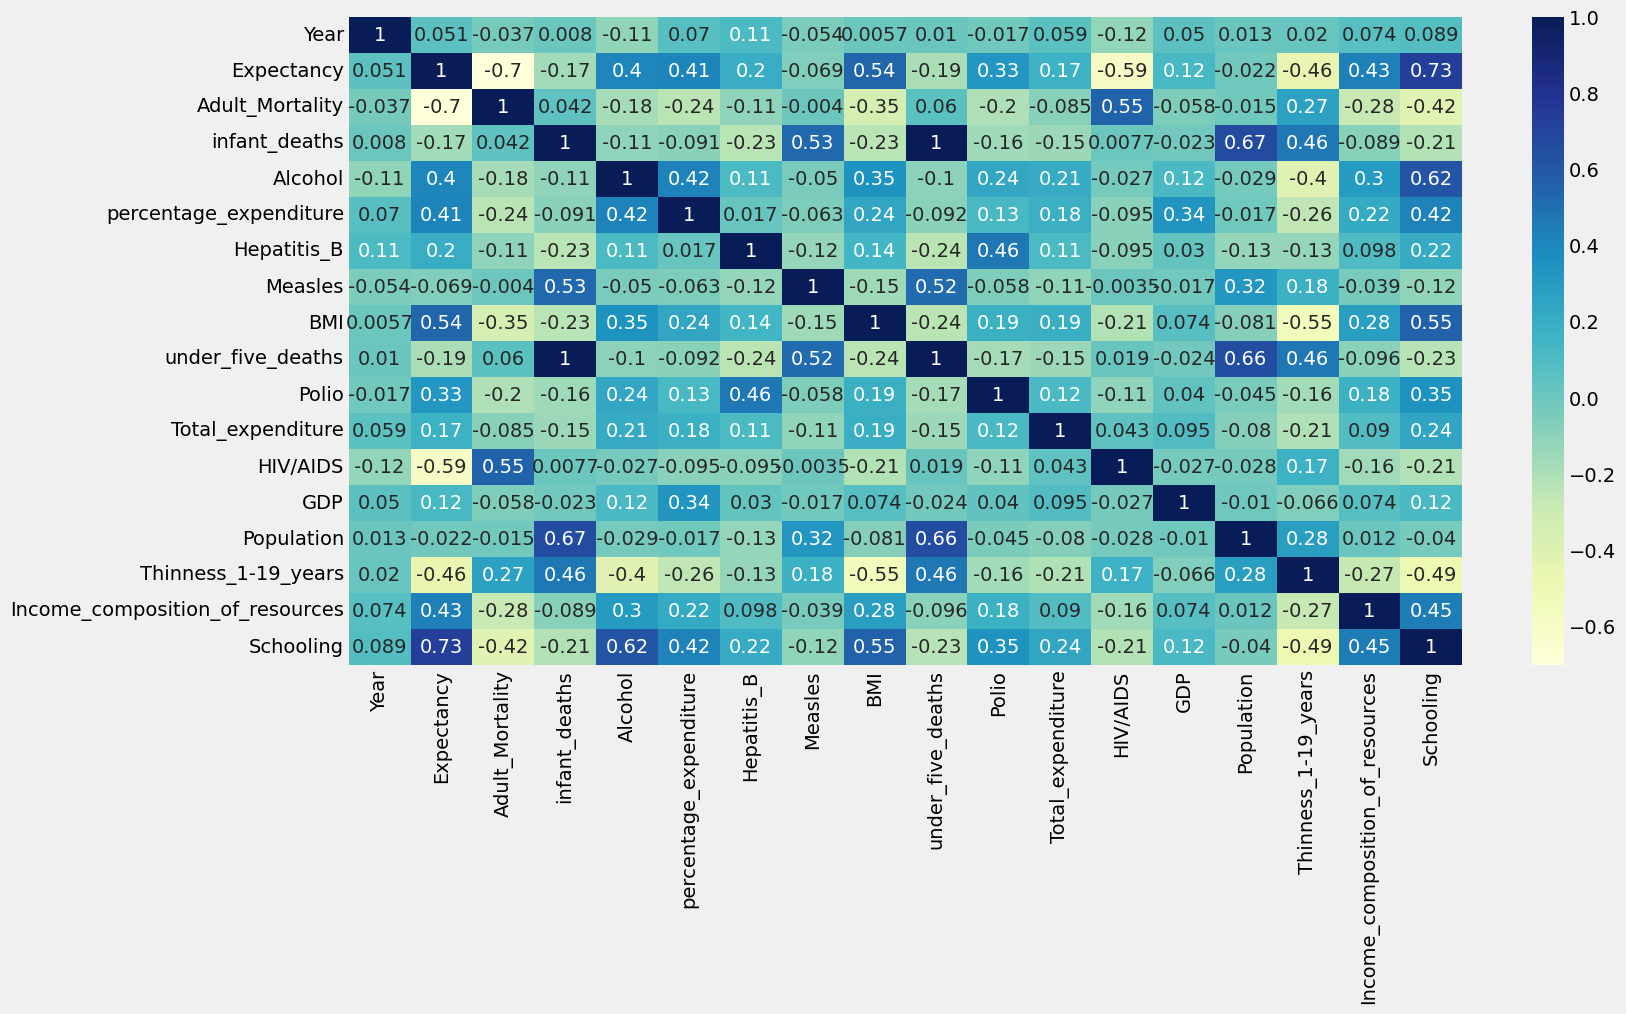

In [18]:
# Heatmap of all the attributes

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'YlGnBu')

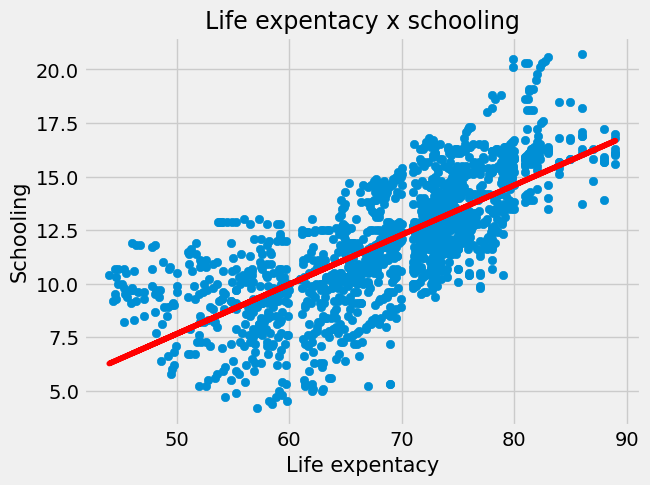

In [19]:
# In the heatmap is possible to conclude that schooling is what influences the highest on 
# long life expectancies for by looking to the 0.73 value

# So let's dive into the relation between life expectancy and schooling

x = df['Expectancy']

y = df['Schooling']

plt.title('Life expentacy x schooling', fontsize = 17)

plt.xlabel('Life expentacy', fontsize = 15)

plt.ylabel('Schooling', fontsize = 15)

plt.scatter(x, y)

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r')

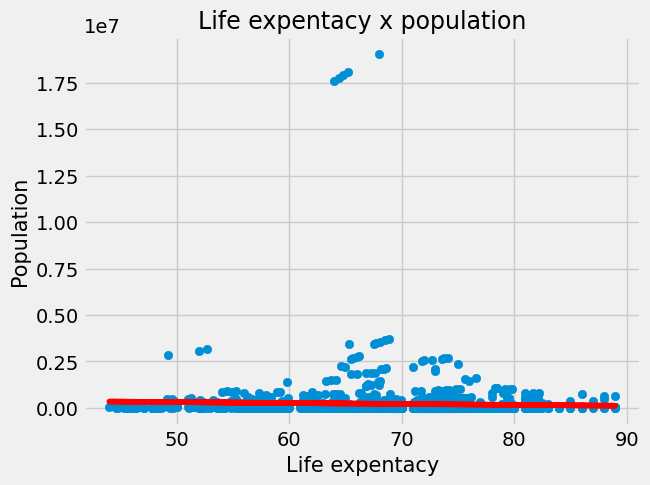

In [20]:
# It's clear how the higher the schooling is, the higher the life expectancy is as well

# Now, let's see how this relation is between an attribute with low influence, such as
# population, which has a -0.022 score on the heatmap

x = df['Expectancy']

y = df['Population']/df['Expectancy']

plt.title('Life expentacy x population', fontsize = 17)

plt.xlabel('Life expentacy', fontsize = 15)

plt.ylabel('Population', fontsize = 15)

plt.scatter(x, y)

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r')

In [21]:
# The graph show how the population has little to no impact in the
# life expectancy since countries with more population often appear
# lower than countries with less people in the graph and it almost doesn't vary.

In [22]:
# Get life expectancy for a specific country

# Function for getting a DataFrame with only the information of the selected country
def filter_by_country(country):
    return df['Country'] == country

country = ''

#Get country for search
#country = input(country)

#X as the years and Y as the expectancy
x, y = (df.where(filter_by_country(country)).dropna())['Year'], (df.where(filter_by_country(country)).dropna())['Expectancy']

if(len(y) == 0):
    print("Error: " + country + " not found!")
else:
    #Graph
    
    plt.plot(x.array, y.array)
    
    plt.show()

Error:  not found!


<Axes: >

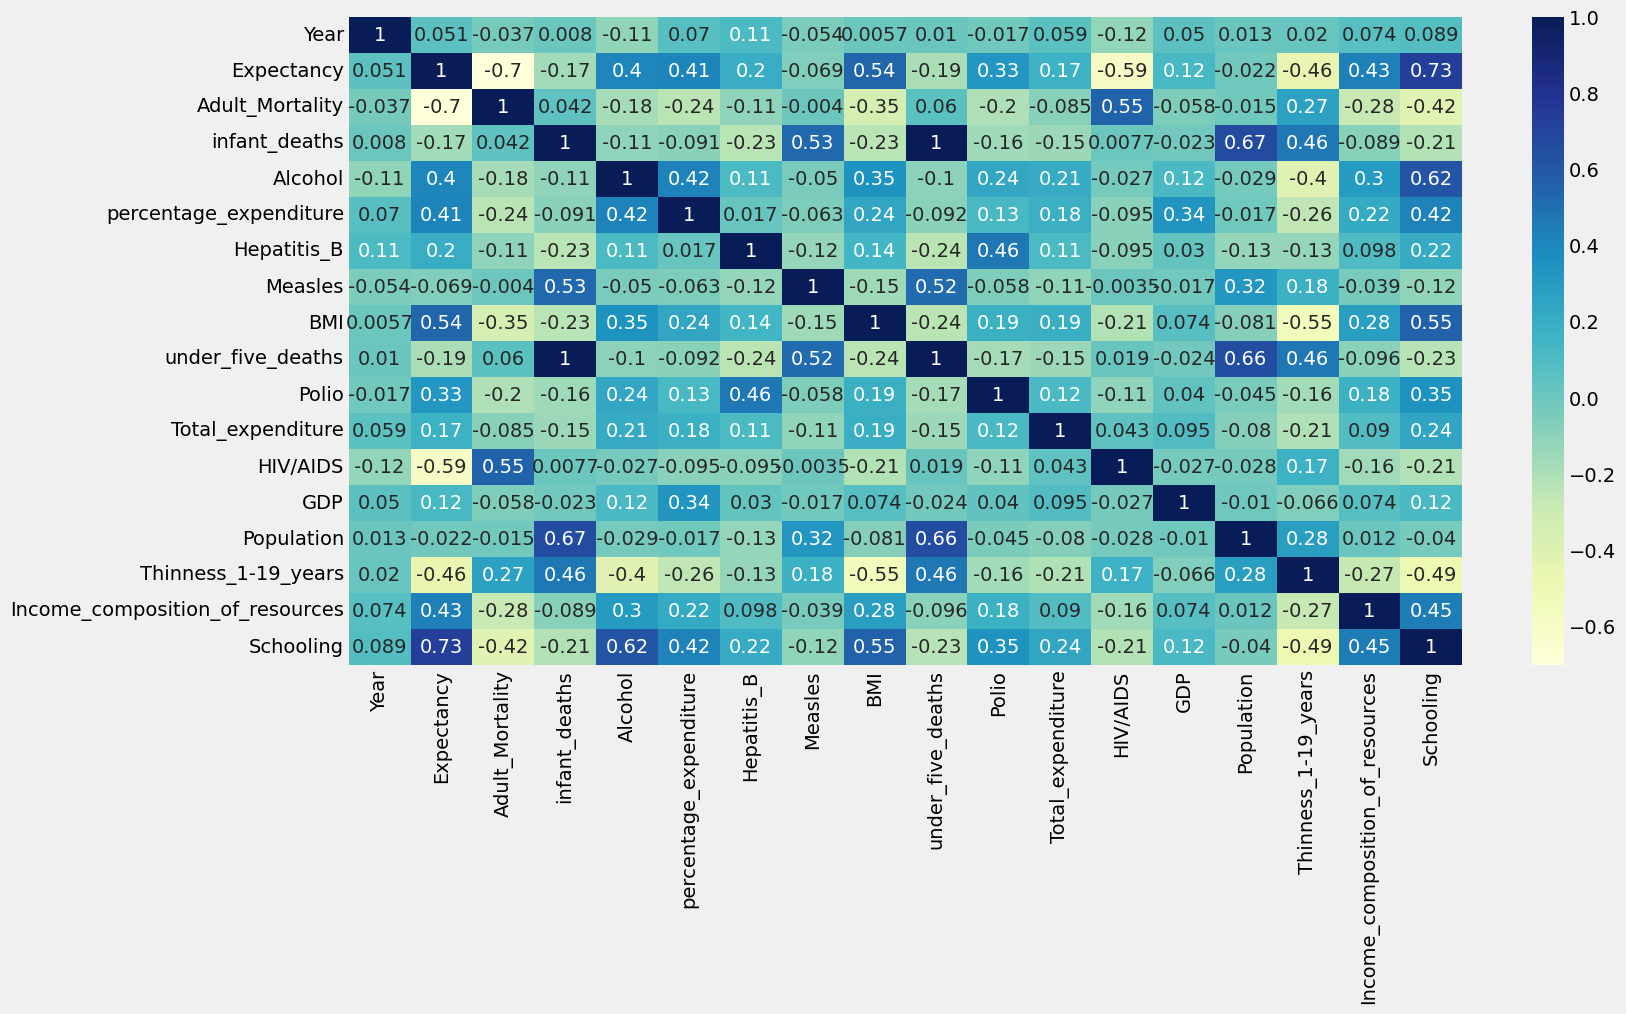

In [23]:
# Let's have a look now into other aspects that influence the life expectancy

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'YlGnBu')

In [24]:
# Giving a look to the heatmap again, it's possible to spot some other attributes that
# highly influence our target

# 'percentuage_expenditure' (Expenditure on health as a percentage of Gross Domestic Product per capita(%))

# BMI and thinness (these are correlated since a country with a higher average BMI
# is always going to have a lower thinness percentage)

# income_composition_of_resources

# 'polio' and 'Hepatitis_B'(vaccine coverage)

# HIV/AIDS (Deaths per 1 000 live births HIV/AIDS)

# 'Alcohol' (positively, surprisingly :) )

# So, now let's puth this informatin into a graphic

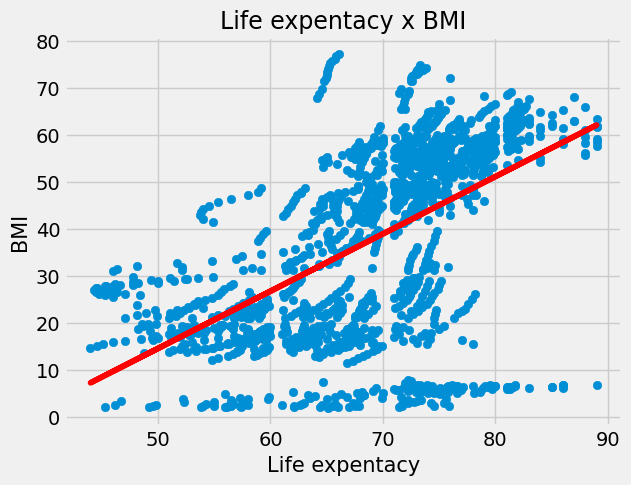

In [25]:
x = df['Expectancy']

y = df['BMI']

plt.title('Life expentacy x BMI', fontsize = 17)

plt.xlabel('Life expentacy', fontsize = 15)

plt.ylabel('BMI', fontsize = 15)

plt.scatter(x, y)

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r')

plt.show()

In [26]:
# It's possible to see how a higher BMI implies a higher life expectancy

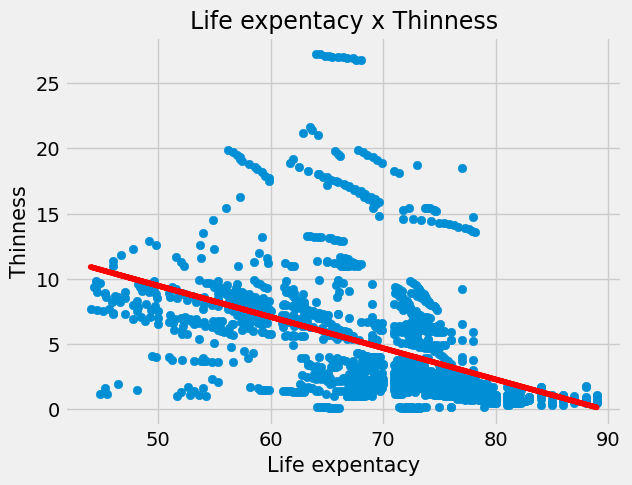

In [27]:
# Now how the graph behaves with the thinness:

x = df['Expectancy']

y = df['Thinness_1-19_years']

plt.title('Life expentacy x Thinness', fontsize = 17)

plt.xlabel('Life expentacy', fontsize = 15)

plt.ylabel('Thinness', fontsize = 15)

plt.scatter(x, y)

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r')

In [28]:
# The lower the thinness, the higher the life expectancy

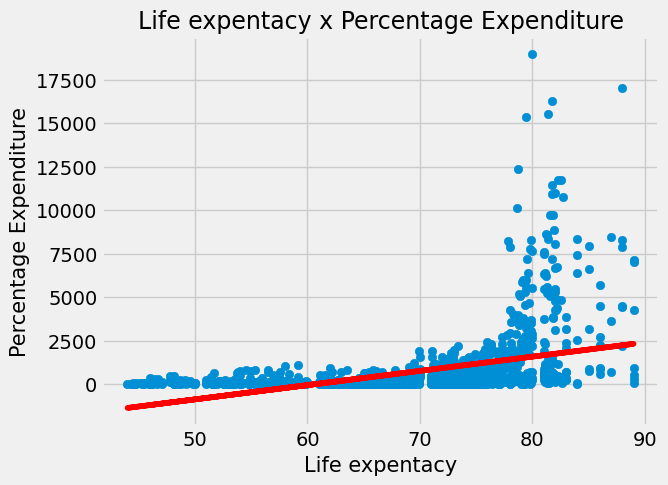

In [29]:
# Now, into the economics

x = df['Expectancy']

y = df['percentage_expenditure']

plt.title('Life expentacy x Percentage Expenditure', fontsize = 17)

plt.xlabel('Life expentacy', fontsize = 15)

plt.ylabel('Percentage Expenditure', fontsize = 15)

plt.scatter(x, y)

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r')

In [30]:
# Positive trend line indicates that they are positively related

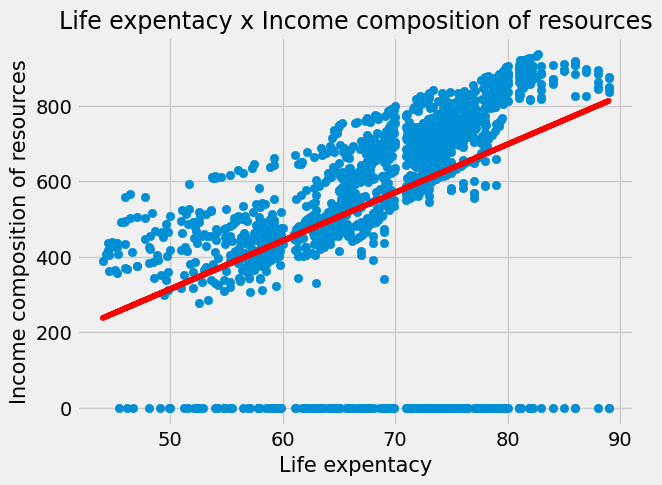

In [31]:
# Now, the income_composition_of_resources

x = df['Expectancy']

y = df['Income_composition_of_resources']

plt.title('Life expentacy x Income composition of resources', fontsize = 17)

plt.xlabel('Life expentacy', fontsize = 15)

plt.ylabel('Income composition of resources', fontsize = 15)

plt.scatter(x, y)

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r')

In [32]:
# Again, the positive trend line

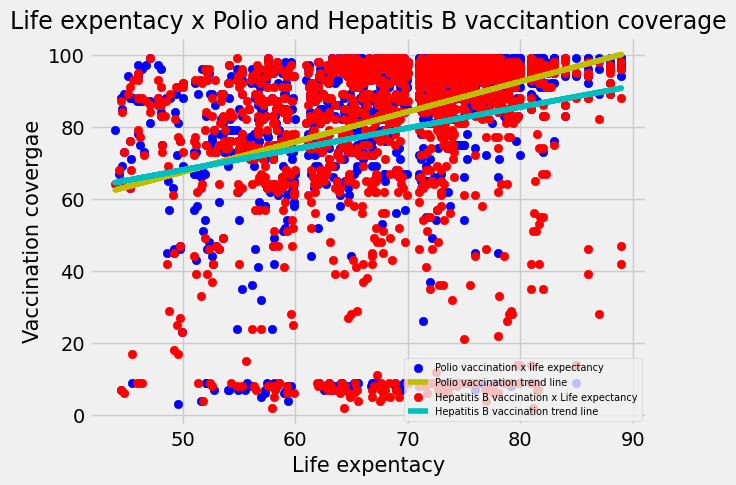

In [33]:
# Let's have a look into the health related info

plt.title('Life expentacy x Polio and Hepatitis B vaccitantion coverage', fontsize = 17)

plt.xlabel('Life expentacy', fontsize = 15)

plt.ylabel('Vaccination covergae', fontsize = 15)

# First, for polio


x = df['Expectancy']

y = df['Polio']

plt.scatter(x, y, c="b", label = "Polio vaccination x life expectancy")

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "y", label = "Polio vaccination trend line")

# Now for Hepatitis

x = df['Expectancy']

y = df['Hepatitis_B']

plt.scatter(x, y, c="r", label = "Hepatitis B vaccination x Life expectancy")

# Adding trend line

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'c', label = "Hepatitis B vaccination trend line")


plt.legend(loc="lower right", fontsize = 7)
plt.show()

In [34]:
# Okay, now we know what influences the most on the life expectancy across the world
# However, there are still some not explored columns 

df.head()

,Country,Continent,Year,Status,Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,65.0,...,83,6.0,8.16,65,0.1,584.259210,33736494.0,17.2,479.00,10.1
1,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,62.0,...,86,58.0,8.18,62,0.1,612.696514,327582.0,17.5,476.00,10.0
2,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,64.0,...,89,62.0,8.13,64,0.1,631.744976,31731688.0,17.7,0.47,9.9
3,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,67.0,...,93,67.0,8.52,67,0.1,669959.000000,3696958.0,17.9,463.00,9.8
4,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,68.0,...,97,68.0,7.87,68,0.1,63.537231,2978599.0,18.2,454.00,9.5


In [35]:
# The status column is an interesting data that we can look into
# But first, we have to transform the Strings into dummies integers

# How many uniques values does it have:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [36]:
# Transform the data from Strings to integers 
# Here, I'll use 0 for developing and 1 for developed

df_mapped = df.copy()

df_mapped['Status'] = df_mapped['Status'].map({'Developing': 0, 'Developed': 1})

# Checking if it worked

df_mapped.head()

,Country,Continent,Year,Status,Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Income_composition_of_resources,Schooling
0,Afghanistan,Asia,2015,0,65.0,263,62,0.01,71.279624,65.0,...,83,6.0,8.16,65,0.1,584.259210,33736494.0,17.2,479.00,10.1
1,Afghanistan,Asia,2014,0,59.9,271,64,0.01,73.523582,62.0,...,86,58.0,8.18,62,0.1,612.696514,327582.0,17.5,476.00,10.0
2,Afghanistan,Asia,2013,0,59.9,268,66,0.01,73.219243,64.0,...,89,62.0,8.13,64,0.1,631.744976,31731688.0,17.7,0.47,9.9
3,Afghanistan,Asia,2012,0,59.5,272,69,0.01,78.184215,67.0,...,93,67.0,8.52,67,0.1,669959.000000,3696958.0,17.9,463.00,9.8
4,Afghanistan,Asia,2011,0,59.2,275,71,0.01,7.097109,68.0,...,97,68.0,7.87,68,0.1,63.537231,2978599.0,18.2,454.00,9.5


<Axes: >

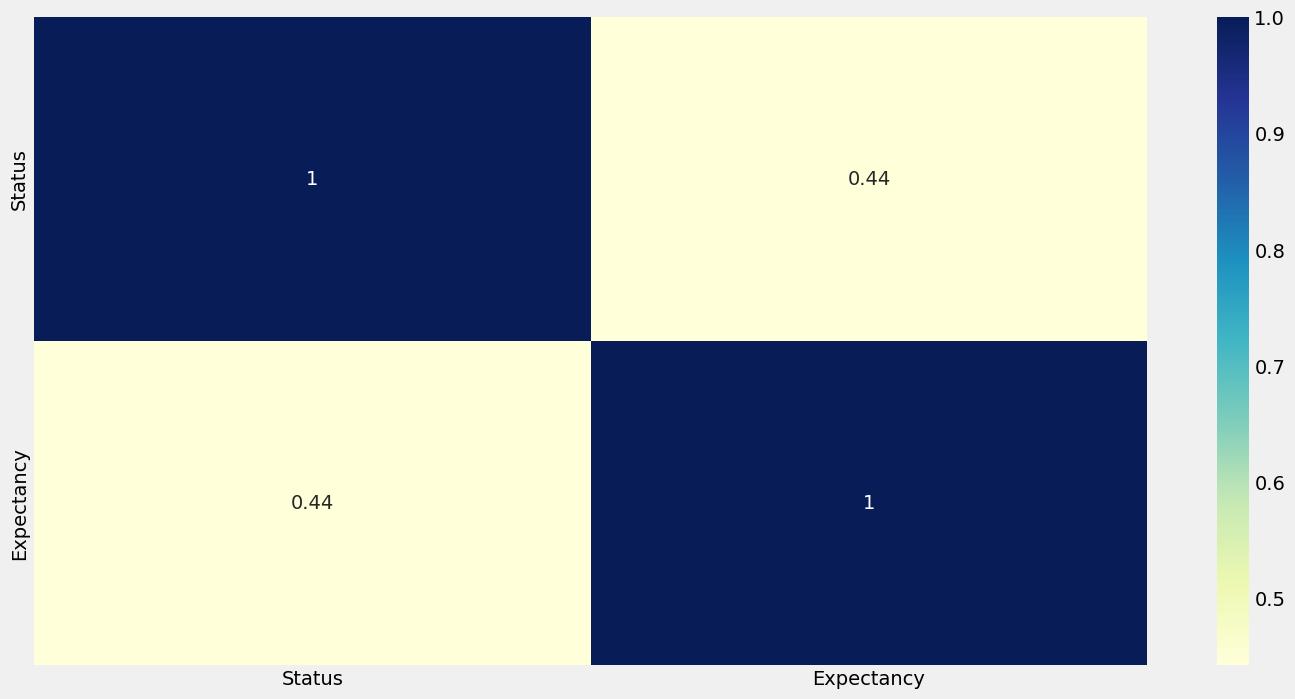

In [37]:
# Let's see with the heat map how much the status of a country influences its life expectancy:

# Getting only expectancy and status to facilitate comprehension

df_status_expectancy = df_mapped.filter(['Status','Expectancy'])

plt.figure(figsize=(16,8))
sns.heatmap(df_status_expectancy.corr(numeric_only = True), annot = True, cmap = 'YlGnBu')

In [38]:
# It's possible to see that the status has a relevant influence on the
# life expectancy

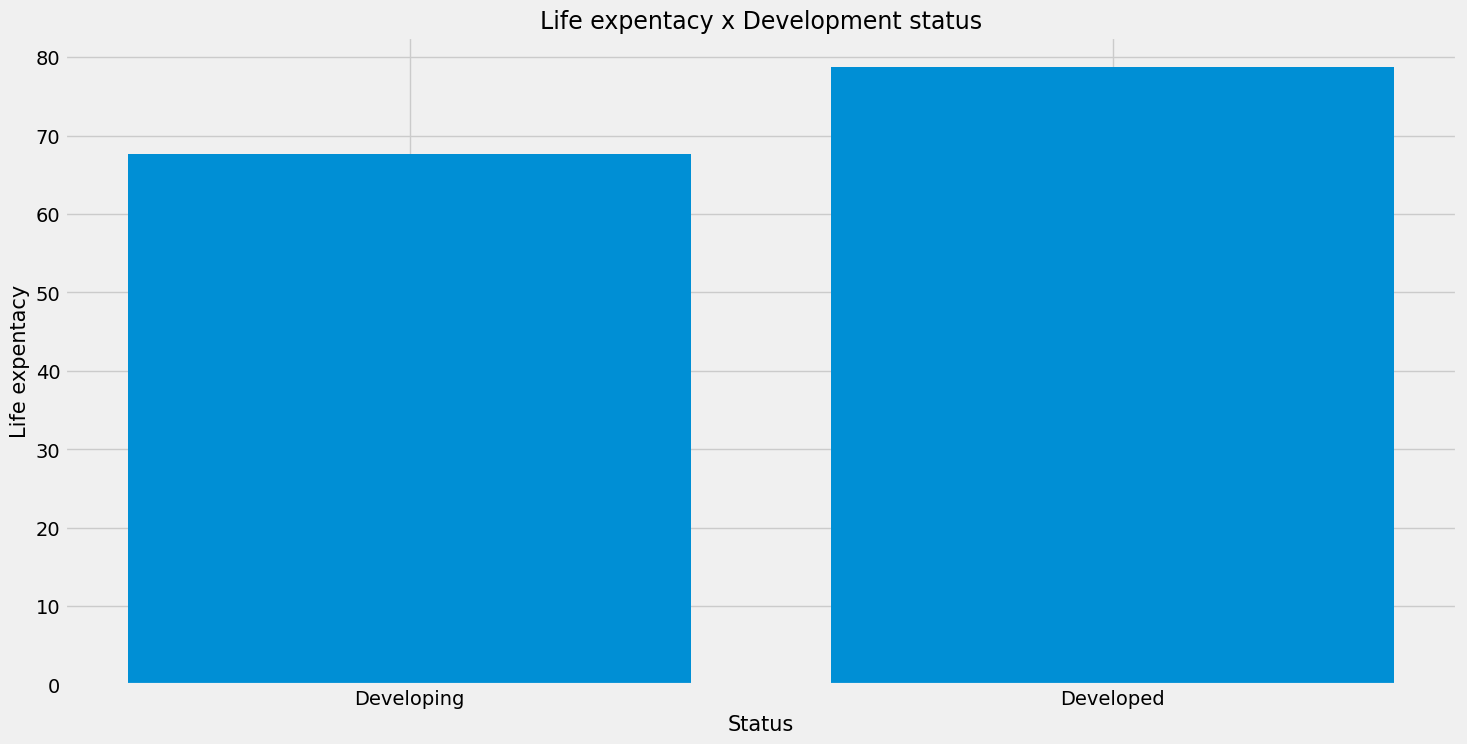

In [39]:
# Now, the income_composition_of_resources

plt.figure(figsize=(16, 8))

y = df_mapped.groupby(['Status'])['Expectancy'].mean()

x = df['Status'].unique()

plt.title('Life expentacy x Development status', fontsize = 17)

plt.ylabel('Life expentacy', fontsize = 15)

plt.xlabel('Status', fontsize = 15)

plt.bar(x, y)

plt.show()

In [40]:
"""
    That concludes all the analysis I could think of for this DataSet.
This is my first time making a data science project completely on my own so, I reckon on mistaked
or bad optimizations.
    I am enjoying a lot this new approach towards programming and will for sure keep studying and
getting better at it, I promise :)
    Check out my machine learning project as well: https://github.com/Rossetow/stock-price-prediction-model
    Thanks for taking your time to see what I developed <3
"""

'\n    That concludes all the analysis I could think of for this DataSet.\nThis is my first time making a data science project completely on my own so, I reckon on mistaked\nor bad optimizations.\n    I am enjoying a lot this new approach towards programming and will for sure keep studying and\ngetting better at it, I promise :)\n    Check out my machine learning project as well: https://github.com/Rossetow/stock-price-prediction-model\n    Thanks for taking your time to see what I developed <3\n'